In [2]:
#IMPORTING REQUIRED LIBRARIES FOR WEB SCRAPING
import requests
from bs4 import BeautifulSoup
from IPython.display import clear_output
import time
import numpy as np
import pandas as pd
import re

In [2]:
#checking url status
url = 'https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?propertyType=apartment,builder-floor,villa,residential-plot,independent-house,studio-apartment'
data = requests.get(url)
data

<Response [200]>

In [3]:
#getting content from html
soup = BeautifulSoup(data.content,'html')

In [4]:
soup.find('a',attrs={'class':'typelink'}).span.text

'3 '

# SCRAPING DATA FROM SINGLE PAGE

In [5]:
#getting Bedrooms
a = soup.find_all('a',attrs={'class':'typelink'})
Bedroom = []
for i in a:
  i = i.span.text
  i = i.replace('Residential Plot', '0').replace(' ', '')
  Bedroom.append(i)
Bedroom

['3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '2',
 '2',
 '3',
 '6',
 '0',
 '0',
 '0',
 '3',
 '3',
 '2',
 '3']

In [6]:
soup.find('span',attrs={'itemprop':'addressLocality'}).text

'Poranki'

In [7]:
#getting location
b = soup.find_all('span',attrs={'itemprop':'addressLocality'})
Location = [i.text for i in b]
Location

['Poranki',
 'Poranki',
 'Kankipadu',
 'PNT Colony',
 'Labbipet',
 'Poranki',
 'Gannavaram',
 'Gunadala',
 'Gollapudi',
 'Enikepadu',
 'Benz Circle',
 'Vidhyadharpuram',
 'Penamaluru',
 'Kankipadu',
 'Poranki',
 'Kankipadu',
 'Benz Circle',
 'Gannavaram',
 'Payakapuram',
 'Benz Circle']

In [8]:
soup.find('div',attrs={'data-type':'price-link'}).text

' 55.5 L'

In [9]:
#getting price
c = soup.find_all('div', attrs={'data-type': 'price-link'})

Price = []
for i in c:
    i = i.text.strip()  # Strip leading/trailing whitespaces
    if 'Cr' in i:
        i = i.replace(' Cr', '')  # Remove 'Cr' from the string
        i = float(i) * 100  # Convert value from crores to lakhs
    else:
        i = i.replace(' L', '')  # Remove 'L' from the string
        i = float(i)
    Price.append(i)
Price

[55.5,
 48.0,
 50.0,
 72.0,
 60.0,
 40.0,
 59.86,
 56.0,
 89.0,
 39.0,
 59.0,
 95.0,
 110.00000000000001,
 16.83,
 33.0,
 20.0,
 166.0,
 72.0,
 56.0,
 166.0]

In [10]:
soup.find('td',attrs={'class':'size'}).text

'1587 '

In [11]:
#getting area
d = soup.find_all('td',attrs={'class':'size'})

area = []
for i in d:
  i = i.text
  i = i.replace(' ', '')
  area.append(i)
area

['1587',
 '1450',
 '1290',
 '1400',
 '950',
 '1200',
 '1663',
 '1500',
 '2062',
 '1250',
 '1350',
 '1600',
 '3700',
 '1782',
 '1800',
 '1500',
 '2317',
 '1650',
 '1000',
 '2317']

In [12]:
soup.find('td',attrs={'class':'val'}).text

'Ready to move'

In [13]:
#getting product name
e = soup.find_all('td',attrs={'class':'val'})

status = []
for i in e:
  i = i.text
  status.append(i)
status

['Ready to move',
 'Ready to move',
 'Under Construction',
 'Ready to move',
 'Ready to move',
 'Ready to move',
 'Ready to move',
 'Ready to move',
 'Ready to move',
 'Ready to move',
 'Ready to move',
 'Under Construction',
 'Ready to move',
 'Resale',
 'Resale',
 'Resale',
 'Under Construction',
 'Ready to move',
 'Ready to move',
 'Under Construction']

In [14]:
soup.find('ul',attrs={'class':'listing-details'}).text

'3 BathroomsResale West facing'

In [15]:
#getting details
f = soup.find_all('ul',attrs={'class':'listing-details'})

details = []
for i in f:
  i = i.text
  details.append(i)
details

['3 BathroomsResale West facing',
 '2 BathroomsResale ',
 '2 BathroomsResale NorthEast facing',
 '4 - 5 years old4 BathroomsResale ',
 '2 BathroomsResale East facing',
 '2 BathroomsResale ',
 '3 BathroomsResale East facing',
 '3 BathroomsResale ',
 '3 BathroomsResale ',
 '2 BathroomsResale ',
 '2 BathroomsResale East facing',
 '3 BathroomsResale West facing',
 '6 - 7 years old7 BathroomsResale ',
 '1 - 2 years old',
 '1 open sidesWest facing',
 '6 - 7 years old',
 '3 BathroomsNew East facing',
 '2 - 3 years old3 BathroomsNew ',
 '5 years old2 BathroomsNew ',
 '3 BathroomsNew East facing']

In [16]:
g = soup.find_all('ul', attrs={'class': 'listing-details'})

Bathroom = []
Facing = []

for i in g:
    i = i.text
    bathroom_count = re.findall(r'(\d+) Bathrooms', i)
    if bathroom_count:
        Bathroom.append(int(bathroom_count[0]))
    else:
        Bathroom.append(0)
        
    facing_direction = re.findall(r'(North|South|East|West|NorthEast|NorthWest|SouthEast|SouthWest) facing', i)
    if facing_direction:
        Facing.append(facing_direction[0])
    else:
        Facing.append(0)

In [17]:
Bathroom

[3, 2, 2, 4, 2, 2, 3, 3, 3, 2, 2, 3, 7, 0, 0, 0, 3, 3, 2, 3]

In [18]:
Facing

['West',
 0,
 'NorthEast',
 0,
 'East',
 0,
 'East',
 0,
 0,
 0,
 'East',
 'West',
 0,
 0,
 'West',
 0,
 'East',
 0,
 0,
 'East']

In [19]:
soup.find('div',attrs={'class':'title-line'}).text

'3 BHK Apartment'

In [20]:
#getting title
h = soup.find_all('div',attrs={'class':'title-line'})

title = []
for i in h:
  i = i.text
  title.append(i)
title

['3 BHK Apartment',
 '2 BHK Apartment',
 '2 BHK Independent House',
 '2 BHK Independent House',
 '2 BHK Apartment',
 '2 BHK Apartment in Hycon Elite',
 '3 BHK Apartment',
 '3 BHK Independent Floor',
 '3 BHK Apartment',
 '2 BHK Apartment',
 '2 BHK Independent House',
 '3 BHK Independent Floor',
 '6 BHK Independent House',
 'Residential Plot in Harivillu Fortune Legendary',
 'Residential Plot',
 'Residential Plot',
 '3 BHK Apartment in Pooja Tree Storey',
 '3 BHK Apartment in Sri Naga Sun Rise Enclave',
 '2 BHK Independent House',
 '3 BHK Apartment in Pooja Tree Storey']

In [21]:
k = soup.find_all('div', attrs={'class': 'title-line'})

property_types = ['Apartment', 'Builder Floor', 'Villa', 'Residential Plot', 'Independent House', 'Studio Apartment']
Type = []

for i in k:
    i = i.text
    for p_type in property_types:
        if p_type in i:
            Type.append(p_type)

Type

['Apartment',
 'Apartment',
 'Independent House',
 'Independent House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Independent House',
 'Independent House',
 'Residential Plot',
 'Residential Plot',
 'Residential Plot',
 'Apartment',
 'Apartment',
 'Independent House',
 'Apartment']

# #SCRAPING DATA FROM MULTIPLE PAGES

In [22]:
Bedroom = []
Location = []
Price = []
area = []
Status = []
Bathroom = []
Facing = []
Type = []
property_types = ['Apartment', 'Builder Floor', 'Villa', 'Residential Plot', 'Independent House', 'Studio Apartment']

for i in range(1,63):
  url = url+str(i)

  print(f'Scraping info from page {i} ')
  clear_output(wait=True)

  #we are pausing for 3 sec
  time.sleep(3)
  response = requests.get(url)
  soup = BeautifulSoup(response.text,'html')

  a = soup.find_all('a',attrs={'class':'typelink'})
  for i in a:
    i = i.span.text
    i = i.replace('Residential Plot', '0').replace(' ', '')
    Bedroom.append(i)

  b = soup.find_all('span',attrs={'itemprop':'addressLocality'})
  for i in b:
    Location.append(i.text)

  c = soup.find_all('div', attrs={'data-type': 'price-link'})
  for i in c:
      i = i.text.strip()  # Strip leading/trailing whitespaces
      if 'Cr' in i:
          i = i.replace(' Cr', '')  # Remove 'Cr' from the string
          i = float(i) * 100  # Convert value from crores to lakhs
      else:
          i = i.replace(' L', '')  # Remove 'L' from the string
          i = float(i)
      Price.append(i)

  d = soup.find_all('td',attrs={'class':'size'})
  for i in d:
    i = i.text
    i = i.replace(' ', '')
    area.append(i)

  e = soup.find_all('td',attrs={'class':'val'})
  for i in e:
    i = i.text
    status.append(i)

  g = soup.find_all('ul', attrs={'class': 'listing-details'})
  for i in g:
      i = i.text
      bathroom_count = re.findall(r'(\d+) Bathrooms', i)
      if bathroom_count:
          Bathroom.append(int(bathroom_count[0]))
      else:
          Bathroom.append('0')

      facing_direction = re.findall(r'(North|South|East|West|NorthEast|NorthWest|SouthEast|SouthWest) facing', i)
      if facing_direction:
          Facing.append(facing_direction[0])
      else:
          Facing.append('0')

  k = soup.find_all('div', attrs={'class': 'title-line'})
  for i in k:
      i = i.text
      for p_type in property_types:
          if p_type in i:
              Type.append(p_type)

Scraping info from page 62 


#GETTING LENGTH OF THE ELEMENTS

In [23]:
print(len(Bedroom))
print(len(Location))
print(len(Price))
print(len(area))
print(len(status))
print(len(Bathroom))
print(len(Facing))
print(len(Type))

1240
1240
1240
1240
1260
1240
1240
1116


In [24]:
#Resampling
Bedroom = Bedroom[:1100]
Location = Location[:1100]
Price = Price[:1100]
area = area[:1100]
status = status[:1100]
Bathroom = Bathroom[:1100]
Facing = Facing[:1100]
Type = Type[:1100]

In [136]:
# Create a dictionary with the scraped data
data =pd.DataFrame({
    'Bedroom': Bedroom,
    'Bathroom': Bathroom,
    'Location': Location,
    'area': area,
    'status': status,
    'Facing': Facing,
    'Type': Type,
    'Price': Price
})

data

,Bedroom,Bathroom,Location,area,status,Facing,Type,Price
0,3,3,Poranki,1587,Ready to move,West,Apartment,55.5
1,2,2,Poranki,1450,Ready to move,0,Apartment,48.0
2,2,2,Kankipadu,1290,Under Construction,NorthEast,Independent House,50.0
3,2,4,PNT Colony,1400,Ready to move,0,Independent House,72.0
4,2,2,Labbipet,950,Ready to move,East,Apartment,60.0
...,...,...,...,...,...,...,...,...
1095,0,0,Kankipadu,1500,Resale,0,Apartment,20.0
1096,3,3,Benz Circle,2317,Under Construction,East,Independent House,166.0
1097,3,3,Gannavaram,1650,Ready to move,0,Apartment,72.0
1098,2,2,Payakapuram,1000,Ready to move,0,Apartment,56.0


CHECKING NULL VALUES

In [137]:
data.isnull().sum()

Bedroom     0
Bathroom    0
Location    0
area        0
status      0
Facing      0
Type        0
Price       0
dtype: int64

DROPING NULL VALUES

In [27]:
data.dropna(inplace=True)

In [28]:
data

,Bedroom,Bathroom,Location,area,status,Facing,Type,Price
0,3,3,Poranki,1587,Ready to move,West,Apartment,55.5
1,2,2,Poranki,1450,Ready to move,0,Apartment,48.0
2,2,2,Kankipadu,1290,Under Construction,NorthEast,Independent House,50.0
3,2,4,PNT Colony,1400,Ready to move,0,Independent House,72.0
4,2,2,Labbipet,950,Ready to move,East,Apartment,60.0
...,...,...,...,...,...,...,...,...
1095,0,0,Kankipadu,1500,Resale,0,Apartment,20.0
1096,3,3,Benz Circle,2317,Under Construction,East,Independent House,166.0
1097,3,3,Gannavaram,1650,Ready to move,0,Apartment,72.0
1098,2,2,Payakapuram,1000,Ready to move,0,Apartment,56.0


In [138]:
#Converting the above cleansed data into CSV file
data.to_csv('House2.csv')

In [3]:
data = pd.read_csv('House2.csv')

In [4]:
data

,Unnamed: 0,Bedroom,Bathroom,Location,area,status,Facing,Type,Price
0,0,3,3,Poranki,1587,Ready to move,West,Apartment,55.5
1,1,2,2,Poranki,1450,Ready to move,0,Apartment,48.0
2,2,2,2,Kankipadu,1290,Under Construction,NorthEast,Independent House,50.0
3,3,2,4,PNT Colony,1400,Ready to move,0,Independent House,72.0
4,4,2,2,Labbipet,950,Ready to move,East,Apartment,60.0
...,...,...,...,...,...,...,...,...,...
1095,1095,0,0,Kankipadu,1500,Resale,0,Apartment,20.0
1096,1096,3,3,Benz Circle,2317,Under Construction,East,Independent House,166.0
1097,1097,3,3,Gannavaram,1650,Ready to move,0,Apartment,72.0
1098,1098,2,2,Payakapuram,1000,Ready to move,0,Apartment,56.0


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data

,Bedroom,Bathroom,Location,area,status,Facing,Type,Price
0,3,3,Poranki,1587,Ready to move,West,Apartment,55.5
1,2,2,Poranki,1450,Ready to move,0,Apartment,48.0
2,2,2,Kankipadu,1290,Under Construction,NorthEast,Independent House,50.0
3,2,4,PNT Colony,1400,Ready to move,0,Independent House,72.0
4,2,2,Labbipet,950,Ready to move,East,Apartment,60.0
...,...,...,...,...,...,...,...,...
1095,0,0,Kankipadu,1500,Resale,0,Apartment,20.0
1096,3,3,Benz Circle,2317,Under Construction,East,Independent House,166.0
1097,3,3,Gannavaram,1650,Ready to move,0,Apartment,72.0
1098,2,2,Payakapuram,1000,Ready to move,0,Apartment,56.0


In [7]:
data.shape

(1100, 8)

FINDING INFORMATION OF THE DATA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   1100 non-null   int64  
 1   Bathroom  1100 non-null   int64  
 2   Location  1100 non-null   object 
 3   area      1100 non-null   int64  
 4   status    1100 non-null   object 
 5   Facing    1100 non-null   object 
 6   Type      1100 non-null   object 
 7   Price     1100 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 68.9+ KB


MAPPING THE CATEGORICAL VALUES TO NUMERIC

In [9]:
data['Location'] = data['Location'].map({'Poranki':0,
                                         'Kankipadu':1,
                                         'Benz Circle':2,
                                         'Gannavaram':3,
                                         'PNT Colony':4,
                                         'Labbipet':5,
                                         'Gunadala':6,
                                         'Gollapudi':7,
                                         'Enikepadu':8,
                                         'Vidhyadharpuram':9,
                                         'Penamaluru':10,
                                         'Payakapuram':11})

data['status'] = data['status'].map({'Resale':0,
                                     'Under Construction':1,
                                     'Ready to move':2})

data['Facing'] = data['Facing'].map({'0':0,
                                     'East':1,
                                     'West':2,
                                     'NorthEast':3})

data['Type'] = data['Type'].map({'Apartment':0,
                                 'Independent House':1,
                                 'Residential Plot':2})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   1100 non-null   int64  
 1   Bathroom  1100 non-null   int64  
 2   Location  1100 non-null   int64  
 3   area      1100 non-null   int64  
 4   status    1100 non-null   int64  
 5   Facing    1100 non-null   int64  
 6   Type      1100 non-null   int64  
 7   Price     1100 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 68.9 KB


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DATA VISUALIZATION USING BAR ,LINE,SCATTER AND HIST PLOTS

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

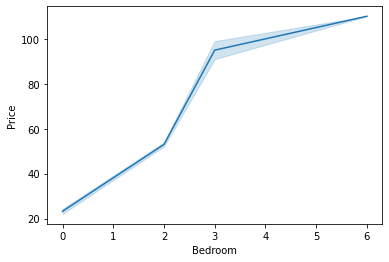

In [39]:
sns.lineplot(x="Bedroom",y="Price",data=data)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

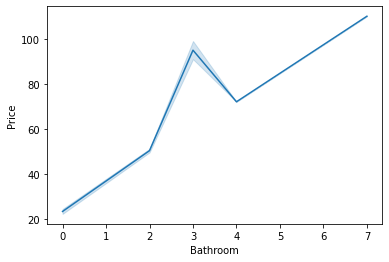

In [40]:
sns.lineplot(x="Bathroom",y="Price",data=data)

<AxesSubplot:xlabel='area', ylabel='Price'>

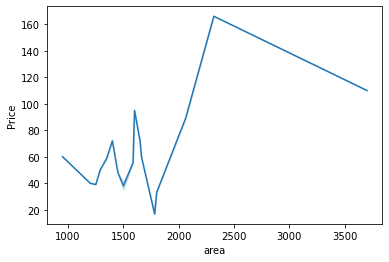

In [41]:
sns.lineplot(x="area",y="Price",data=data)

<AxesSubplot:xlabel='status', ylabel='Price'>

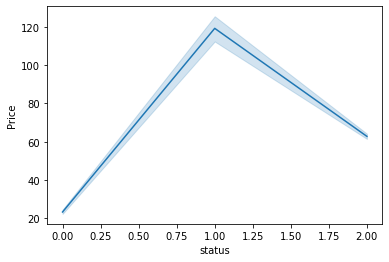

In [42]:
sns.lineplot(x="status",y="Price",data=data)

<AxesSubplot:xlabel='Location', ylabel='Price'>

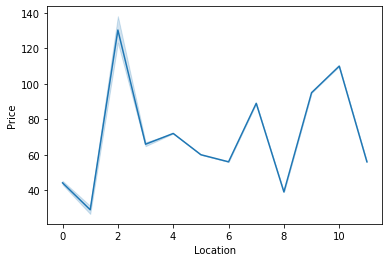

In [43]:
sns.lineplot(x="Location",y="Price",data=data)

<AxesSubplot:xlabel='Type', ylabel='Price'>

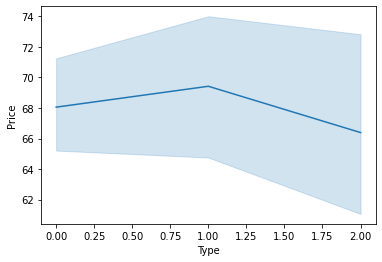

In [44]:
sns.lineplot(x="Type",y="Price",data=data)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

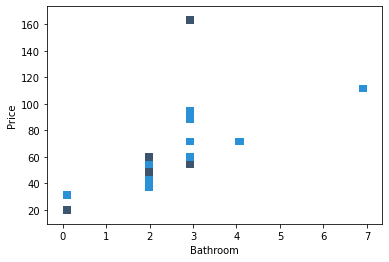

In [45]:
sns.histplot(x="Bathroom",y="Price",data=data)

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

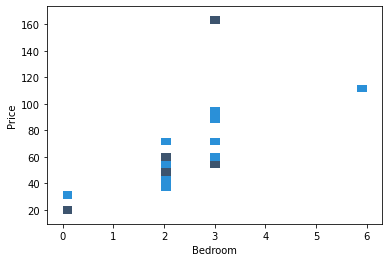

In [46]:
sns.histplot(x="Bedroom",y="Price",data=data)

<AxesSubplot:xlabel='area', ylabel='Price'>

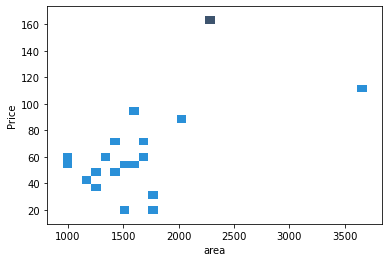

In [47]:
sns.histplot(x="area",y="Price",data=data)

<AxesSubplot:xlabel='Facing', ylabel='Price'>

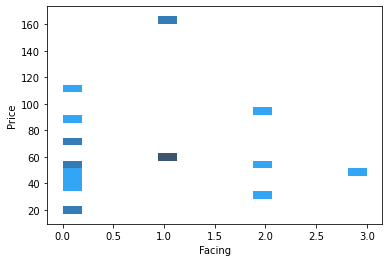

In [48]:
sns.histplot(x="Facing",y="Price",data=data)

<AxesSubplot:xlabel='status', ylabel='Price'>

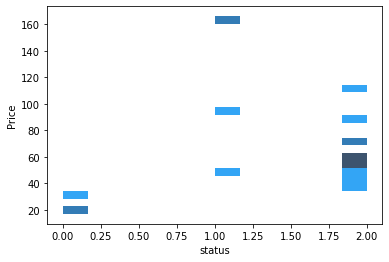

In [49]:
sns.histplot(x="status",y="Price",data=data)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

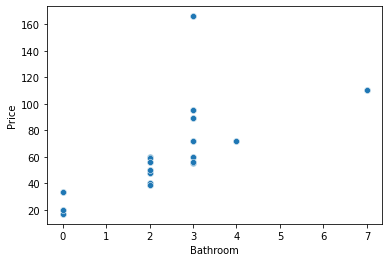

In [50]:
sns.scatterplot(data=data, x='Bathroom', y="Price")

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

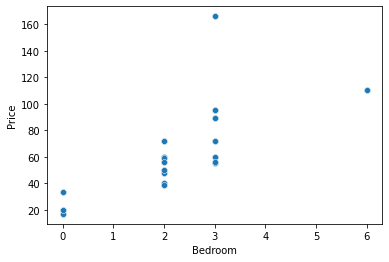

In [51]:
sns.scatterplot(data=data, x='Bedroom', y="Price")

<AxesSubplot:xlabel='status', ylabel='Price'>

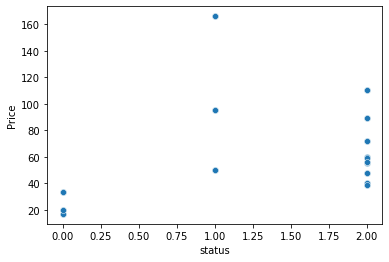

In [52]:
sns.scatterplot(data=data, x='status', y="Price")

<AxesSubplot:xlabel='area', ylabel='Price'>

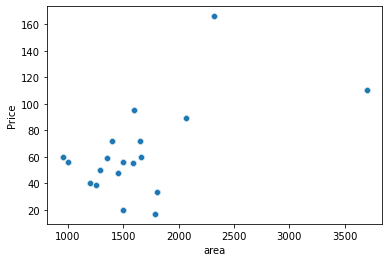

In [53]:
sns.scatterplot(data=data, x='area', y="Price")

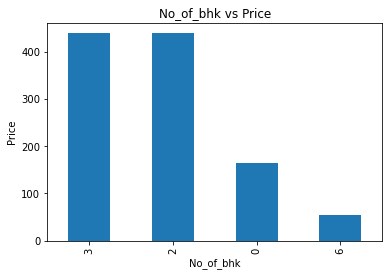

In [54]:
data['Bedroom'].value_counts().plot(kind='bar')
plt.ylabel("Price")
plt.xlabel("No_of_bhk")
plt.title("No_of_bhk vs Price")
plt.show()

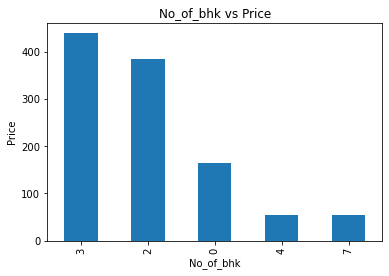

In [55]:
data['Bathroom'].value_counts().plot(kind='bar')
plt.ylabel("Price")
plt.xlabel("No_of_bhk")
plt.title("No_of_bhk vs Price")
plt.show()

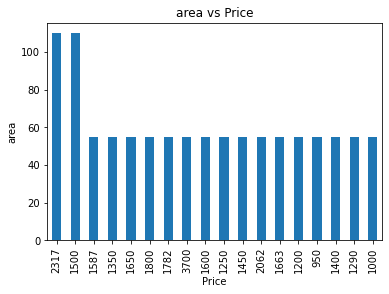

In [56]:
data['area'].value_counts().plot(kind='bar')
plt.xlabel("Price")
plt.ylabel("area")
plt.title("area vs Price")
plt.show()

FINDING THE FEATURE AND TARGET VARIABLES

In [57]:
data.columns

Index(['Bedroom', 'Bathroom', 'Location', 'area', 'status', 'Facing', 'Type',
       'Price'],
      dtype='object')

In [12]:
X = data.drop(['Price'], axis=1)
y = data["Price"]

In [13]:
X

,Bedroom,Bathroom,Location,area,status,Facing,Type
0,3,3,0,1587,2,2,0
1,2,2,0,1450,2,0,0
2,2,2,1,1290,1,3,1
3,2,4,4,1400,2,0,1
4,2,2,5,950,2,1,0
...,...,...,...,...,...,...,...
1095,0,0,1,1500,0,0,0
1096,3,3,2,2317,1,1,1
1097,3,3,3,1650,2,0,0
1098,2,2,11,1000,2,0,0


In [14]:
y

0        55.5
1        48.0
2        50.0
3        72.0
4        60.0
        ...  
1095     20.0
1096    166.0
1097     72.0
1098     56.0
1099    166.0
Name: Price, Length: 1100, dtype: float64

IMPORTING REQUIRED LIBRARIES

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [16]:
# train-test split of the data (80 % - 20 % split)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

# scale the values of the data variables
# for easier computations
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

print('X train shape:\t', X_train.shape)
print('y train shape:\t', y_train.shape)
print('X test shape:\t', X_test.shape)
print('y test shape:\t', y_test.shape)

X train shape:	 (880, 7)
y train shape:	 (880,)
X test shape:	 (220, 7)
y test shape:	 (220,)


DECISION TREE REGRESSOR

In [150]:
#decision tree
tr_regressor = DecisionTreeRegressor(random_state=1)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [151]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(pred_tr,y_test))
print("Mean Squared Error:",metrics.mean_squared_error(pred_tr,y_test))
print("RootMean Squared Error:",np.sqrt(metrics.mean_squared_error(pred_tr,y_test)))

Mean Absolute Error: 1.162706294880164e-15
Mean Squared Error: 1.9276891938491635e-29
RootMean Squared Error: 4.390545744949213e-15


In [152]:
print("Decision tree Regression Model Score is",round(tr_regressor.score(X_test,y_test)))

Decision tree Regression Model Score is 1


In [159]:
features = np.array([[2,2,5,1000,2,1,1]])
prediction=tr_regressor.predict(features)[0]
print(prediction)

60.0


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


RANDOM FOREST REGRESSOR

In [17]:
#random forest regression model
rf_regressor = RandomForestRegressor(n_estimators=30,random_state=1)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred = rf_regressor.predict(X_test)
rf_score = rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mean_squared_error(y_test, rf_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 1.970141221880278e-15
mse: 5.9896057094599e-29
rmse: 7.739254298354525e-15


In [19]:
print("Random Forest Regression Model Score is",round(rf_regressor.score(X_test,y_test)))

Random Forest Regression Model Score is 1


In [20]:
features = np.array([[2,2,5,1000,2,1,1]])
prediction=rf_regressor.predict(features)[0]
print(prediction)

59.86666666666667


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


LINEAR REGRESSION

In [155]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [156]:
#then we go for prediction and calculate the metrics
y_pred = lin_reg.predict(X_test)

In [71]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_pred,y_test))
print("Mean Squared Error:",metrics.mean_squared_error(y_pred,y_test))
print("RootMean Squared Error:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean Absolute Error: 21.729000128135894
Mean Squared Error: 822.3818968139369
RootMean Squared Error: 28.67720169078456


In [162]:
features = np.array([[3,1,5,1780,2,1,5]])
prediction=lin_reg.predict(features)[0]
print(prediction)

58.231490797585025


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
#r-squared value
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred)*100)

55.10904202167095


In [73]:
#Go for prediction by passing our input
X.iloc[0];y[0]

55.5

In [130]:
features = np.array([[3,1,5,1780,2,1,5]])
prediction=regressor.predict(features)[0]

In [131]:
prediction

110.0

KNN REGRESSOR

In [88]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
y_pred = regressor.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.03272727272727274
mse: 0.10545454545454537
rmse: 0.32473765635439533


In [91]:
regressor.score(X_test, y_test)

0.9999424360435588

In [122]:
X.iloc[1];y[1]

48.0

In [123]:
X.iloc[1095];y[1095]

20.0

In [126]:
features = np.array([[3,2,5,1000,2,1,1]])
prediction=regressor.predict(features)[0]

In [127]:
print(prediction)

110.0


In [22]:
#once we are confident enough to test the model in production-ready environment
#will save the models using pickle
import pickle

In [24]:
#we will create pickle files for both regression model and scaling model
#open() is generally used for file modes
#wb=write binary  format 
pickle.dump(rf_regressor,open('HOUSE.pkl','wb')) 

In [110]:
#now let,s give some validation data and test on pickle files
pickled_model = pickle.load(open('HOUSE.pkl','rb'))